## Stroke Work
<br>Author: Daniel Maina Nderitu<br>
Project: MADIVA<br>
Purpose: Survival logic (VERY IMPORTANT)<br>
Notes:   Sanity checks before models

#### Bootstrap cell

In [48]:
# =================== BOOTSTRAP CELL ===================
# Standard setup for all notebooks
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parents[0]  # assumes notebooks are in a subfolder
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# ========================================================
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.config.variables import COVARIATES

# ========================================================
# Optional for warnings and nicer plots
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

import sys
from pathlib import Path

# ========================================================
# 1️⃣ Ensure project root is in Python path
# Adjust this if your notebooks are nested deeper
PROJECT_ROOT = Path.cwd().parents[0]  # assumes notebooks are in a subfolder
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# ========================================================
# 2️⃣ Import helper to load paths
from src.utils.helpers import load_paths

# ========================================================
# 3️⃣ Load paths from config.yaml (works regardless of notebook location)
paths = load_paths()

# ========================================================
# 4️⃣ Optionally, print paths to confirm
for key, value in paths.items():
    print(f"{key}: {value}")

# ========================================================
# 5️⃣ Now you can use these paths in your notebook:
# Example:
DATA_DIR = paths['DATA_DIR']
OUT_DIR = paths['OUT_DIR']
FIG_DIR = paths['FIG_DIR']

# ========================================================

BASE_DIR: D:\APHRC\GoogleDrive_ii\stata_do_files\madiva\stroke_work
DATA_DIR: D:\APHRC\GoogleDrive_ii\stata_do_files\madiva\stroke_work\data
OUT_DIR: D:\APHRC\GoogleDrive_ii\stata_do_files\madiva\stroke_work\model_output
FIG_DIR: D:\APHRC\GoogleDrive_ii\stata_do_files\madiva\stroke_work\visualization


### Import data - from previous step

In [ ]:
# data saved as pickle:
df = pd.read_pickle(OUT_DIR / "df_step04_processed.pkl")

#### Distribution of time_at_risk after imputation

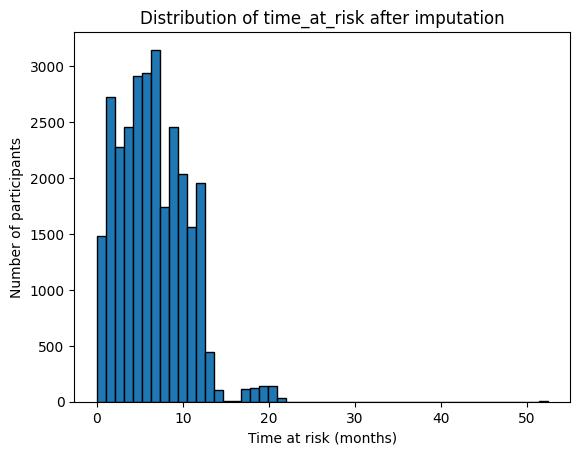

In [49]:
# ---------------------------------------------------------------------------
# Optional: visualize distribution after imputation
# ---------------------------------------------------------------------------
import matplotlib.pyplot as plt

plt.hist(df['time_at_risk'], bins=50, edgecolor='black')
plt.xlabel("Time at risk (months)")
plt.ylabel("Number of participants")
plt.title("Distribution of time_at_risk after imputation")
plt.savefig(FIG_DIR / "time_at_risk_Agincourt_i.png", dpi=300, bbox_inches='tight')
plt.show()


#### Visualization time_at_risk & offset

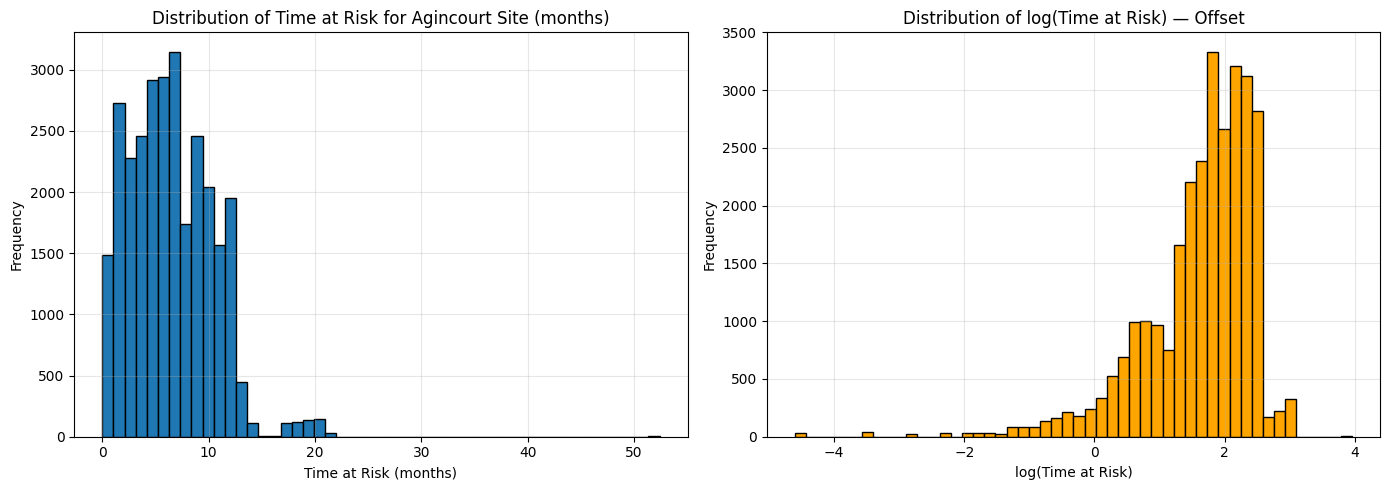

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 5))

# ---------------------------------------------------------------------------
# Raw distribution
# ---------------------------------------------------------------------------
plt.subplot(1, 2, 1)
plt.hist(df['time_at_risk'], bins=50, edgecolor='k')
plt.title('Distribution of Time at Risk for Agincourt Site (months)')
plt.xlabel('Time at Risk (months)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# ---------------------------------------------------------------------------
# Log-transformed (offset)
# ---------------------------------------------------------------------------
plt.subplot(1, 2, 2)
plt.hist(np.log(df['time_at_risk'][df['time_at_risk'] > 0]), bins=50, edgecolor='k', color='orange')
plt.title('Distribution of log(Time at Risk) — Offset')
plt.xlabel('log(Time at Risk)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(FIG_DIR / "time_at_risk_main.png", dpi=300, bbox_inches='tight')
plt.show()

#### Stroke transition tables

In [51]:
# ---------------------------------------------------------------------------
# Identify individuals who experienced a stroke (event == 1)
# ---------------------------------------------------------------------------
# stroke_cases = df[df['event'] == 1]['individual_id'].unique()
stroke_cases = (
    df.loc[df['event'] == 1, 'individual_id']
      .unique()
)

# ---------------------------------------------------------------------------
# Subset full data for only those individuals (EXPLICIT COPY)
# ---------------------------------------------------------------------------
# df_stroke_transition = df[df['individual_id'].isin(stroke_cases)]
df_stroke_transition = (
    df.loc[df['individual_id'].isin(stroke_cases)]
      .copy()   
)

selected = ['individual_id', 'start_date', 'end_date', 'stroke_prev', 'event'
            , 'time_at_risk', 'cumulative_stroke', 'offset'] # , 'res_eventdate'


# ---------------------------------------------------------------------------
# Sort and inspect
# ---------------------------------------------------------------------------
# check_df = df_stroke_transition[selected].sort_values(['individual_id', 'start_date']).head(20)
check_df = (
    df_stroke_transition[selected]
        .sort_values(['individual_id', 'start_date'])
        .head(20)
)
check_df.describe()

,start_date,end_date,stroke_prev,event,time_at_risk,cumulative_stroke,offset
count,20,20,20.0,20.000000,20.000000,20.000000,20.000000
mean,2012-08-14 12:00:00,2013-01-11 01:12:00,0.0,0.500000,4.913347,0.500000,1.433005
min,2008-07-22 00:00:00,2009-03-30 00:00:00,0.0,0.000000,2.234086,0.000000,0.803832
25%,2012-08-10 00:00:00,2012-12-19 00:00:00,0.0,0.000000,2.611910,0.000000,0.959533
50%,2012-09-29 00:00:00,2012-12-19 00:00:00,0.0,0.500000,4.106776,0.500000,1.412606
75%,2013-06-02 12:00:00,2014-10-09 18:00:00,0.0,1.000000,4.854209,1.000000,1.573802
max,2015-08-06 00:00:00,2015-11-30 00:00:00,0.0,1.000000,19.778234,1.000000,2.984582
std,NaN,NaN,0.0,0.512989,3.826270,0.512989,0.516849


#### End

In [42]:
# Saved as pickle (faster for large data, preserves types)
df.to_pickle(OUT_DIR / "df_step05_processed.pkl")